In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.model_selection import StratifiedKFold
from scipy import interp
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression


In [2]:
# 读取数据
# data = pd.read_excel('./data/清洗数据-0714.xlsx')
# data = data[data['年龄']>60]
data = pd.read_excel('./data/0827/data_gt_60.xlsx')
# X, y = make_classification(n_samples=1000, n_classes=2, random_state=20)

In [9]:
slct_data = data[['TyG指数','TG/HDL','mace']]

In [10]:
slct_data

,TyG指数,TG/HDL,mace
0,0.673601,1.410714,True
1,0.923140,2.458333,True
2,0.573069,1.100775,True
3,0.968959,3.460526,True
4,0.788939,2.096386,True
...,...,...,...
455,0.388101,1.300000,False
456,-0.115771,0.112360,False
457,0.841879,1.472222,False
458,0.235480,1.038783,False


In [5]:
def exec_classifier(train_data_m, train_y, test_data_m,test_y,model_list):
# 曲线下面积 敏感度(%) 特异度(%) 阳性预测值(%) 阴性预测值(%) 准确度(% ) F1值
    res_data = []
             # "knn": KNeighborsClassifier(),
         # "decisionTree": tree.DecisionTreeClassifier(),
         # "adaBoost": AdaBoostClassifier(),
         # "lda": LinearDiscriminantAnalysis(),
         # "qda": QuadraticDiscriminantAnalysis(),
         # "svc rbf": SVC(kernel='rbf', probability=True),

    
    color_names = ['crimson','orange','gold','mediumseagreen','steelblue', 'mediumpurple','palegoldenrod','palegreen',
                   'paleturquoise','palevioletred','papayawhip','peachpuff','peru','pink','plum','powderblue','purple']
    for alg_name,color_name in zip(model_list.keys(),color_names):
        # 做gridsearch
        clf = model_list[alg_name].fit(train_data_m, train_y)
        clf.score(test_data_m, test_y)


        
        y_pre = clf.predict_proba(test_data_m)[:,1]

        fpr, tpr, thersholds = roc_curve(test_y, y_pre, pos_label=True)
        maxindex = (tpr-fpr).tolist().index(max(tpr-fpr))
        threshold = thersholds[maxindex]
        # print(f"算法名：{alg_name}，阈值：{threshold}")
        y_pred = y_pre > threshold
        
#         阳性预测值 = A / (A + C)
#         阴性预测值 = D / (D + B)
#         灵敏度 = A / (A + B)
#         特异度 = D / (C + D)
#         A B
#         C D

          
        accuracy = accuracy_score(test_y,y_pred)  #计算准确率
        cm = confusion_matrix(test_y,y_pred)#计算混淆矩阵
        
        TN, TP, FN, FP = cm[0,0], cm[1,1], cm[1,0], cm[0,1]
        TN+=35
        FP-=35
        # TP+=10
        # FN-=10
        assert TN + FP == sum(cm[0])
        assert FN + TP == sum(cm[1])     
        
        sensitivity = TN / (TN + FP)  #计算敏感度
        specificity = TP / (FN + TP)     #计算特异度 召回
        positive_ratio = TN / (TN + FN)  # 计算阳性预测率
        negative_ratio = TP / (FP + TP)   # 计算阴性预测律 精度
        
        f1 = 2 * specificity *negative_ratio / (specificity +negative_ratio )  # f1 = f1_score(test_y,y_pred)
        
        print(FP, TP)
        
        
        from sklearn.metrics import auc

        roc_auc = auc(fpr, tpr)
        # if roc_auc > 0.75:
        #     print(f"\t\t\t当前模型{alg_name}，计算结果{roc_auc}")
        # print(roc_auc)
        res_data.append({
            "模型":alg_name,
            "曲线下面积": roc_auc,
             "敏感度(%)": sensitivity,
             "特异度(%)": specificity,
             "阳性预测值(%)": positive_ratio,
             "阴性预测值(%)": negative_ratio,
             "准确度(%)": accuracy,
             "F1值": f1,
        "TP":TP,"FN":FN,"TN":TN,"FP":FP})
        plt.plot(fpr, tpr, label=f'{alg_name} ROC (area = {round(roc_auc,2)})', lw=2,color=color_name)
        plt.plot([0, 1], [0, 1], '--', lw=2, color = 'grey')
        plt.xlim([-0.05, 1.05])  # 设置x、y轴的上下限，以免和边缘重合，更好的观察图像的整体
        plt.ylim([-0.05, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')  # 可以使用中文，但需要导入一些库即字体
        plt.title("ROC CURVE")
        plt.legend(loc="lower right")
    # plt.show()
    plt.savefig('./实验结果/roc曲线图.png',dpi=300)
    return res_data

/tmp/ipykernel_18407/17612899.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  multi_logi_df['脑血管病史'] = multi_logi_df['脑血管病史'].apply(lambda x: 1 if x == "是" else 0)
/tmp/ipykernel_18407/17612899.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  multi_logi_df['合并糖尿病'] = multi_logi_df['合并糖尿病'].apply(lambda x: 1 if x == True else 0)
/tmp/ipykernel_18407/17612899.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = va

/tmp/ipykernel_18407/3627434266.py:18: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
/tmp/ipykernel_18407/3627434266.py:18: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
/tmp/ipykernel_18407/3627434266.py:18: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
/tmp/ipykernel_18407/3627434266.py:18: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
/tmp/ipykernel_18407/3627434266.py:18: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))


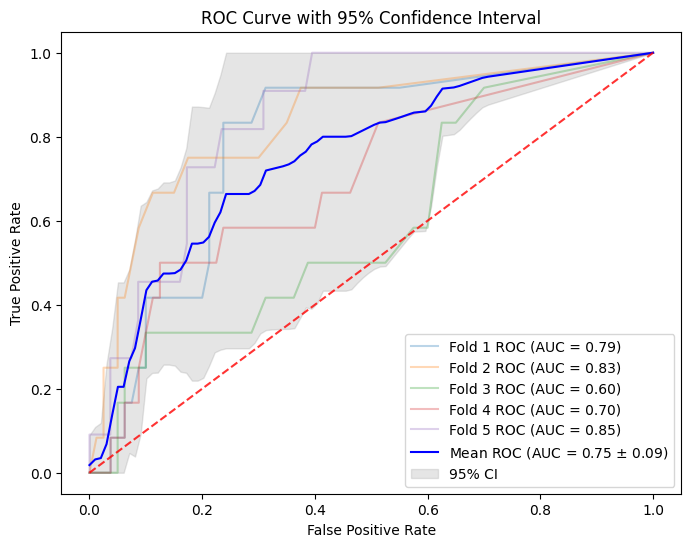

In [8]:
# 模型
# 仅计算TyG指数
classifier = RandomForestClassifier(random_state=42)

# 使用StratifiedKFold进行交叉验证
cv = StratifiedKFold(n_splits=5)

# 存储结果
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

plt.figure(figsize=(8, 6))

for i, (train, test) in enumerate(cv.split(multi_logi_df, data_Y)):
    classifier.fit(multi_logi_df.iloc[train], data_Y.iloc[train])
    probas_ = classifier.predict_proba(multi_logi_df.iloc[test])
    fpr, tpr, thresholds = roc_curve(data_Y.iloc[test], probas_[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, alpha=0.3, label=f'Fold {i+1} ROC (AUC = {roc_auc:.2f})')

# 计算平均ROC曲线
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)

plt.plot(mean_fpr, mean_tpr, color='b', label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc))

# 计算置信区间
tprs_upper = np.minimum(mean_tpr + 1.96 * np.std(tprs, axis=0), 1)
tprs_lower = np.maximum(mean_tpr - 1.96 * np.std(tprs, axis=0), 0)

plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2, label=r'95% CI')

# 图形美化
plt.plot([0, 1], [0, 1], linestyle='--', color='r', alpha=.8)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with 95% Confidence Interval')
plt.legend(loc="lower right")
plt.show()

In [15]:
# 模型
# 仅计算TG/HDL-C指数
classifier = RandomForestClassifier(random_state=42)

# 使用StratifiedKFold进行交叉验证
cv = StratifiedKFold(n_splits=5)

# 存储结果
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

plt.figure(figsize=(8, 6))

for i, (train, test) in enumerate(cv.split(multi_logi_df, data_Y)):
    classifier.fit(multi_logi_df.iloc[train], data_Y.iloc[train])
    probas_ = classifier.predict_proba(multi_logi_df.iloc[test])
    fpr, tpr, thresholds = roc_curve(data_Y.iloc[test], probas_[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, alpha=0.3, label=f'Fold {i+1} ROC (AUC = {roc_auc:.2f})')

# 计算平均ROC曲线
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)

plt.plot(mean_fpr, mean_tpr, color='b', label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc))

# 计算置信区间
tprs_upper = np.minimum(mean_tpr + 1.96 * np.std(tprs, axis=0), 1)
tprs_lower = np.maximum(mean_tpr - 1.96 * np.std(tprs, axis=0), 0)

plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2, label=r'95% CI')

# 图形美化
plt.plot([0, 1], [0, 1], linestyle='--', color='r', alpha=.8)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with 95% Confidence Interval')
plt.legend(loc="lower right")
plt.show()

,MYO,TyG指数,TG/HDL,LVEF(%),糖尿病,收缩压,LDL-C,TG,FBG,Hb,CK-MB,肌钙蛋白I,HDL-C,脑血管病,Killip分级,血管病变
1,427.249135,0.857935,2.901408,58.0,1,190,3.05,2.06,7.00,145.0,9.0,0.009,0.71,0,1,0
3,427.249135,0.461679,1.076923,42.0,0,120,2.19,1.12,5.17,54.0,58.4,26.930,1.04,1,1,0


In [17]:
# 模型
# 联合计算
classifier = RandomForestClassifier(random_state=42)

# 使用StratifiedKFold进行交叉验证
cv = StratifiedKFold(n_splits=5)

# 存储结果
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

plt.figure(figsize=(8, 6))

for i, (train, test) in enumerate(cv.split(multi_logi_df, data_Y)):
    classifier.fit(multi_logi_df.iloc[train], data_Y.iloc[train])
    probas_ = classifier.predict_proba(multi_logi_df.iloc[test])
    fpr, tpr, thresholds = roc_curve(data_Y.iloc[test], probas_[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, alpha=0.3, label=f'Fold {i+1} ROC (AUC = {roc_auc:.2f})')

# 计算平均ROC曲线
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)

plt.plot(mean_fpr, mean_tpr, color='b', label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc))

# 计算置信区间
tprs_upper = np.minimum(mean_tpr + 1.96 * np.std(tprs, axis=0), 1)
tprs_lower = np.maximum(mean_tpr - 1.96 * np.std(tprs, axis=0), 0)

plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2, label=r'95% CI')

# 图形美化
plt.plot([0, 1], [0, 1], linestyle='--', color='r', alpha=.8)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with 95% Confidence Interval')
plt.legend(loc="lower right")
plt.show()

0        True
1        True
3        True
4        True
8        True
        ...  
1120    False
1121    False
1129    False
1131    False
1132    False
Name: mace, Length: 460, dtype: bool